## 🏡 CFG +Masters Project: Airbnb Investment Analysis in Essex

This project dives into the world of **Airbnb listings in Essex** with the goal of assisting a holiday lettings company select profitable properties to invest in based on historical Airbnb listing data. 


### 🧠 Project Objective

A holiday lettings company is on the lookout for promising properties across Essex. They are seeking data insights to select properties that can earn the highest income. 

The aims of this project are:
- identify the features that mostly correlates with occupancy rates and annual revenue
- build a machine learning model that predicts which types of properties achieves the highest occupancy rates and revenue potential. 

### 📈 The Data

The data is retrieved from real data acquired from PriceLabs, a subscription-based database that provides professionally managed datasets for existing and potential Airbnb businesses.

### 🛠️ Phase 1 : Data Wrangling and Exploratory Data Analysis

In this first assignment, I am focussing on:
 - **Merging and Data splitting**: to enable a comprenshensive data set, this individual sheets are first merged, and then split into training, validation and testing datasets. 
- **Data cleaning**: To manage missing data, fixing outliers, handling duplicates etc.
- **Pre-processing and transformation**: Encoding and transforming columns as needed.
- ** Exploratory Data Analysis (EDA)**


### 🔍 What I'm Exploring

- **Host features**: Reviews, professionally managed
- **Property Details**: Property type, number of bathrooms, number of occupants 
- **Amenities**: seafront, hot-tub, pets allowed etc
- **Listing features**: Minimum nights, cancellation
- **Financial Metrics**: Adjusted daily rate (ADR), revenue, availability


In [5]:
#import libraries used for the project

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [184]:
# import data files
airbnb_2bed = pd.read_csv("data/airbnb_essex_2bed.csv")
airbnb_2bed.head(5)

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1305239269239446863,Grays,0,NaN,0,42,NaN,NaN,NaN,3,...,11,NaN,0,No,No,No,Yes,No,No,No
1,1323330681470281939,Grays,0,NaN,0,25,NaN,NaN,NaN,1,...,25,5.0,1,No,No,No,Yes,No,No,No
2,960377081653062660,Grays,0,NaN,0,314,NaN,NaN,NaN,3,...,52,4.0,1,No,No,No,Yes,No,No,No
3,1270246391535349924,Grays,0,NaN,0,83,NaN,NaN,NaN,1,...,0,NaN,0,No,No,No,Yes,No,No,No
4,660855460760807240,Grays,0,NaN,0,363,NaN,NaN,Low,4,...,3,3.0,1,No,No,No,Yes,No,No,No


In [185]:
airbnb_3bed= pd.read_csv("data/airbnb_essex_3bed.csv")
airbnb_3bed.head(20)

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1205963819672225857,Southend-on-sea,0,NaN,0,151,NaN,NaN,NaN,5,...,1,0.00,0,No,No,No,Yes,No,No,No
1,870111683833490126,Southend-on-sea,0,NaN,0,138,NaN,NaN,NaN,14,...,56,0.00,0,No,No,No,Yes,No,No,No
2,46934205,Southend-on-sea,0,NaN,0,101,NaN,NaN,NaN,1,...,171,4.71,7,No,No,No,Yes,No,No,No
3,987440215251843897,Southend-on-sea,0,NaN,0,187,NaN,NaN,NaN,3,...,179,4.55,0,No,No,No,Yes,No,No,No
4,1011456380483308029,Southend-on-sea,0,NaN,0,78,NaN,NaN,High,1,...,63,NaN,0,No,No,No,Yes,No,No,No
5,1328503056084676101,Southend-on-sea,0,NaN,0,49,NaN,NaN,NaN,1,...,0,NaN,0,No,No,No,Yes,No,No,No
6,21655790,Southend-on-sea,0,NaN,0,11,NaN,NaN,NaN,1,...,151,4.53,116,No,No,No,Yes,No,No,No
7,42274650,Southend-on-sea,0,NaN,0,118,NaN,NaN,NaN,1,...,0,4.79,62,No,No,No,Yes,No,Yes,No
8,1025488315145820268,Southend-on-sea,0,NaN,0,357,NaN,NaN,NaN,3,...,9,0.00,0,No,No,No,Yes,No,No,No
9,1234606574109875944,Southend-on-sea,0,NaN,0,102,NaN,NaN,NaN,1,...,80,NaN,0,No,No,No,Yes,No,No,No


In [186]:
#checking data of both data files

airbnb_2bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 879 non-null    int64  
 1   town                       879 non-null    object 
 2   est_rental_revenue_median  879 non-null    int64  
 3   estimated_ADR              817 non-null    float64
 4   Est_adj_occupancy          879 non-null    int64  
 5   active_days                879 non-null    int64  
 6   booking_window             817 non-null    float64
 7   length_of_stay             817 non-null    float64
 8   dynamic_pricing            470 non-null    object 
 9   min_stay                   879 non-null    int64  
 10  management                 879 non-null    object 
 11  Bedrooms                   879 non-null    int64  
 12  bathrooms                  879 non-null    float64
 13  max_guests                 879 non-null    int64  

In [187]:
airbnb_3bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 452 non-null    int64  
 1   town                       452 non-null    object 
 2   est_rental_revenue_median  452 non-null    int64  
 3   estimated_ADR              400 non-null    float64
 4   Est_adj_occupancy          452 non-null    int64  
 5   active_days                452 non-null    int64  
 6   booking_window             400 non-null    float64
 7   length_of_stay             400 non-null    float64
 8   dynamic_pricing            240 non-null    object 
 9   min_stay                   452 non-null    int64  
 10  management                 452 non-null    object 
 11  Bedrooms                   452 non-null    int64  
 12  bathrooms                  452 non-null    float64
 13  max_guests                 452 non-null    int64  

In [188]:
#combining both dataset: as there are the same columns, the datasets can be concatetnated. 

data = pd.concat([airbnb_2bed, airbnb_3bed], ignore_index=True)
data.shape


(1331, 27)

The dataset now as 1331 rows and 27 columns of data. 

In [190]:
data.columns

Index(['listing_ID', 'town', 'est_rental_revenue_median', 'estimated_ADR',
       'Est_adj_occupancy', 'active_days', 'booking_window', 'length_of_stay',
       'dynamic_pricing', 'min_stay', 'management', 'Bedrooms', 'bathrooms',
       'max_guests', 'listed_price', 'is_active', 'economic_Category',
       'blocked_days', 'rating', 'Num_Reviews', 'beachfront', 'hot_tub',
       'EV_charger', 'kitchen', 'pool', 'pets_allowed', 'smoking_allowed'],
      dtype='object')

In [191]:
#standardising column names to lowercase
data.columns = data.columns.str.lower()

print(f"Columns in dataset :{data.columns.values}")


Columns in dataset :['listing_id' 'town' 'est_rental_revenue_median' 'estimated_adr'
 'est_adj_occupancy' 'active_days' 'booking_window' 'length_of_stay'
 'dynamic_pricing' 'min_stay' 'management' 'bedrooms' 'bathrooms'
 'max_guests' 'listed_price' 'is_active' 'economic_category'
 'blocked_days' 'rating' 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger'
 'kitchen' 'pool' 'pets_allowed' 'smoking_allowed']


In [ ]:
# establishing independent and target variables
#y = data[['est_adj_occupancy', 'est_rental_revenue_median']]
#X = data.drop(columns=['est_adj_occupancy', 'est_rental_revenue_median'])

In [ ]:
# split data before data wrangling and cleaning to ensure no data leakage for future testing. 
# in this instance a 70:15:15: split will be used for training:validation:testing

#X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=42)  

#checking success of the split
#print(X_train.shape, y_train.shape)

In [ ]:
#X_train.columns.values

### **Data Exploration, Cleaning and Preprocessing**



### Duplicates


Duplicates (based on listing_id) in the dataset can occur as one property can feature within 2 neibourhoods. 

In [192]:
data[data.duplicated(subset=['listing_id'], keep=False)]

,listing_id,town,est_rental_revenue_median,estimated_adr,est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,991120607387030667,Grays,92,92.39,0,366,48.0,1.0,NaN,1,...,0,0.00,0,No,No,No,Yes,No,No,No
24,1339734188104641921,Grays,689,86.08,15,54,7.0,6.0,NaN,2,...,58,NaN,0,No,No,No,Yes,No,No,No
32,1029075368162869978,Grays,1398,93.19,19,79,14.0,4.0,NaN,3,...,281,NaN,0,No,No,No,Yes,No,No,No
34,1313627075795796786,Grays,1805,75.21,44,55,37.0,7.0,NaN,4,...,93,NaN,0,No,No,No,Yes,No,No,No
38,1339093830414323513,Grays,2025,84.36,42,57,5.0,5.0,Low,1,...,39,NaN,0,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,867428043609660988,Brentwood,0,NaN,0,180,NaN,NaN,NaN,7,...,186,0.00,0,No,No,No,Yes,No,Yes,No
1179,809501303830183077,Brentwood,7775,97.19,71,112,26.0,43.0,NaN,2,...,194,5.00,4,No,No,No,Yes,No,No,No
1180,725823036821709871,Brentwood,7859,145.54,15,363,42.0,5.0,NaN,2,...,3,3.83,6,No,No,No,Yes,No,No,No
1190,872913740243580186,Brentwood,51017,147.45,98,352,75.0,18.0,NaN,1,...,14,5.00,23,No,No,Yes,Yes,No,No,No


In [193]:
#dropping any duplicates, keeping the first occurence
data = data.drop_duplicates(subset='listing_id', keep='first')

In [194]:
#checking the remaining data after dropping duplicates
data.shape

(1236, 27)

#### Missing values

<Axes: >

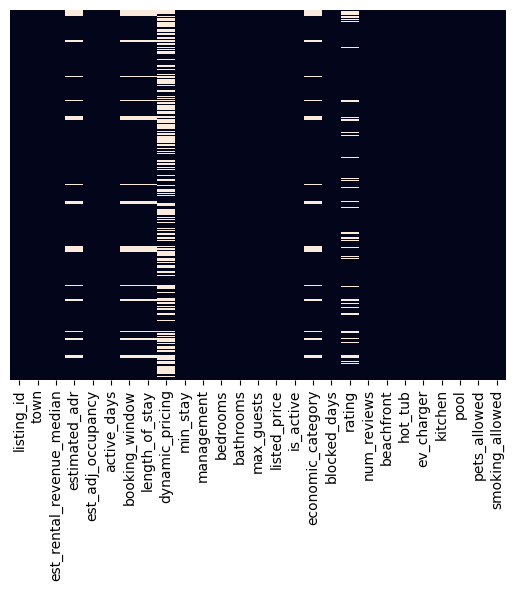

In [178]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [195]:
print("Columns with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Columns with missing values are:
estimated_adr        110
booking_window       110
length_of_stay       110
dynamic_pricing      578
economic_category    110
rating               144
dtype: int64


From this heatmap and table it is clear that 'dynamic_pricing' column has a significant number of of missing values missing and therefore would not be meaningful for further analysis. This column will be dropped. 
It also appears that there are exactly the same number of missing values (110) for 4 columns - "estimated_adr", "booking_window", "length_of_stay" and "economic_category", which suggest that this might be along the same rows. 

In [196]:
data.drop(columns=['dynamic_pricing'], inplace=True)


In [197]:
data.shape

(1236, 26)

In [198]:
mask = data[['estimated_adr', 'booking_window', 'length_of_stay', 'economic_category']].isnull().all(axis=1)

In [199]:
data[mask][['est_adj_occupancy', 'est_rental_revenue_median']].describe()

,est_adj_occupancy,est_rental_revenue_median
count,110.0,110.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


This table confirms that these 110 rows also do not contain data for rental revenue and occupancy which suggests either the properties did not have rental data available or were not rented out during the preceeed 365 days. These rows will therefore be dropped from the study. 

In [200]:
#exploring zero values for target variable 
data[(data['est_adj_occupancy'] == 0)]

,listing_id,town,est_rental_revenue_median,estimated_adr,est_adj_occupancy,active_days,booking_window,length_of_stay,min_stay,management,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1305239269239446863,Grays,0,NaN,0,42,NaN,NaN,3,Small,...,11,NaN,0,No,No,No,Yes,No,No,No
1,1323330681470281939,Grays,0,NaN,0,25,NaN,NaN,1,Small,...,25,5.0,1,No,No,No,Yes,No,No,No
2,960377081653062660,Grays,0,NaN,0,314,NaN,NaN,3,Individual,...,52,4.0,1,No,No,No,Yes,No,No,No
3,1270246391535349924,Grays,0,NaN,0,83,NaN,NaN,1,Individual,...,0,NaN,0,No,No,No,Yes,No,No,No
4,660855460760807240,Grays,0,NaN,0,363,NaN,NaN,4,Small,...,3,3.0,1,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1086248055326152881,Grays,0,NaN,0,94,NaN,NaN,1,Small,...,76,0.0,0,No,No,No,Yes,No,No,No
1256,637389194523502419,Grays,0,NaN,0,52,NaN,NaN,1,Large,...,35,3.5,0,No,No,No,Yes,No,No,No
1257,53784217,Grays,0,NaN,0,183,NaN,NaN,3,Large,...,183,NaN,0,No,No,No,Yes,No,Yes,No
1258,1111585237254811308,Grays,0,NaN,0,127,NaN,NaN,3,Large,...,187,4.5,0,No,No,No,Yes,No,No,No


In [201]:
data[(data['est_rental_revenue_median'] == 0)]

,listing_id,town,est_rental_revenue_median,estimated_adr,est_adj_occupancy,active_days,booking_window,length_of_stay,min_stay,management,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1305239269239446863,Grays,0,NaN,0,42,NaN,NaN,3,Small,...,11,NaN,0,No,No,No,Yes,No,No,No
1,1323330681470281939,Grays,0,NaN,0,25,NaN,NaN,1,Small,...,25,5.0,1,No,No,No,Yes,No,No,No
2,960377081653062660,Grays,0,NaN,0,314,NaN,NaN,3,Individual,...,52,4.0,1,No,No,No,Yes,No,No,No
3,1270246391535349924,Grays,0,NaN,0,83,NaN,NaN,1,Individual,...,0,NaN,0,No,No,No,Yes,No,No,No
4,660855460760807240,Grays,0,NaN,0,363,NaN,NaN,4,Small,...,3,3.0,1,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1086248055326152881,Grays,0,NaN,0,94,NaN,NaN,1,Small,...,76,0.0,0,No,No,No,Yes,No,No,No
1256,637389194523502419,Grays,0,NaN,0,52,NaN,NaN,1,Large,...,35,3.5,0,No,No,No,Yes,No,No,No
1257,53784217,Grays,0,NaN,0,183,NaN,NaN,3,Large,...,183,NaN,0,No,No,No,Yes,No,Yes,No
1258,1111585237254811308,Grays,0,NaN,0,127,NaN,NaN,3,Large,...,187,4.5,0,No,No,No,Yes,No,No,No


In [205]:
# selecting rows where rental revenue is not equals to 0
data = data[data['est_rental_revenue_median'] !=0]
data.head(10)

,listing_id,town,est_rental_revenue_median,estimated_adr,est_adj_occupancy,active_days,booking_window,length_of_stay,min_stay,management,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,991120607387030667,Grays,92,92.39,0,366,48.0,1.0,1,Individual,...,0,0.00,0,No,No,No,Yes,No,No,No
21,1313697930060987731,Grays,567,113.31,4,136,0.0,5.0,4,Moderate,...,3,NaN,0,No,No,No,Yes,No,Yes,No
22,1113554334949213069,Grays,597,119.41,10,49,2.0,5.0,1,Large,...,96,4.42,0,No,No,No,Yes,No,No,No
23,48044279,Grays,627,156.73,13,30,117.0,4.0,2,Moderate,...,43,5.00,4,No,No,No,Yes,No,No,No
24,1339734188104641921,Grays,689,86.08,15,54,7.0,6.0,2,Large,...,58,NaN,0,No,No,No,Yes,No,No,No
25,1297098361098380020,Grays,725,103.58,20,35,3.0,4.0,3,Small,...,48,NaN,0,No,No,No,Yes,No,No,No
26,707159416476506619,Grays,767,95.82,5,154,0.0,8.0,1,Large,...,118,5.00,4,No,No,No,Yes,No,No,No
27,1327757011716829745,Grays,831,103.88,8,104,5.0,3.0,1,Individual,...,8,5.00,2,No,No,No,Yes,No,No,No
28,823024826954796783,Grays,894,111.79,13,64,0.0,5.0,2,Individual,...,1,5.00,1,No,No,No,Yes,No,No,No
29,1232654108694701450,Grays,1211,110.05,15,73,4.0,4.0,3,Individual,...,64,5.00,2,No,No,No,Yes,No,No,No


In [206]:
print("Remaining column with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Remaining column with missing values are:
rating    97
dtype: int64


Now the only column left with 0 values is the 'Rating' column. 

In [209]:
#Checking rating = 0

zero_rating= data[data['rating'] == 0]
zero_rating

,listing_id,town,est_rental_revenue_median,estimated_adr,est_adj_occupancy,active_days,booking_window,length_of_stay,min_stay,management,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,991120607387030667,Grays,92,92.39,0,366,48.0,1.0,1,Individual,...,0,0.0,0,No,No,No,Yes,No,No,No
40,1221810589436294296,Grays,2620,58.23,68,66,3.0,17.0,2,Unknown,...,58,0.0,0,No,No,No,Yes,No,Yes,No
57,747765704472974456,Grays,8163,74.21,97,113,30.0,18.0,10,Individual,...,253,0.0,0,No,No,No,Yes,No,No,No
71,1147815288287555649,Grays,11990,92.94,53,242,13.0,4.0,2,Small,...,60,0.0,0,No,No,No,Yes,No,No,No
108,733136277115449421,Southend-on-Sea,700,116.64,2,359,17.0,1.0,1,Individual,...,7,0.0,0,No,No,No,Yes,No,No,No
110,1215315417654296284,Southend-on-Sea,811,135.19,5,111,52.0,18.0,3,Small,...,9,0.0,0,No,No,No,Yes,No,No,No
112,901982554253254498,Southend-on-Sea,1471,98.10,5,294,20.0,2.0,1,Small,...,72,0.0,0,No,Yes,No,Yes,No,No,No
136,1094955836129864716,Southend-on-Sea,4651,35.78,55,237,29.0,5.0,1,Individual,...,129,0.0,0,No,No,No,Yes,No,No,No
251,1256583474483891189,Chelmsford,4211,100.27,44,95,0.0,36.0,3,Individual,...,114,0.0,0,No,No,No,Yes,No,Yes,Yes
292,822719645110972014,Chelmsford,19583,264.64,95,78,1.0,2.0,5,Small,...,288,0.0,0,No,No,No,Yes,No,No,No


In [ ]:
#checking if there are any invalid rating values (i.e  >5)
over_five = data[data["rating"] > 5]
over_five

,listing_id,town,est_rental_revenue_median,estimated_adr,est_adj_occupancy,active_days,booking_window,length_of_stay,min_stay,management,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


In [214]:
# replacing problematic values for rating

valid_ratings = data["rating"][(data["rating"] >= 1)]

In [215]:
#calculating median, and replacing NaNs and zeros with the median
median_rating=valid_ratings.median()
data["rating"] = data["rating"].apply(lambda x: median_rating if pd.isna(x) or x == 0 else x)


In [216]:
zero_rating= data[data['rating'] == 0]
zero_rating

,listing_id,town,est_rental_revenue_median,estimated_adr,est_adj_occupancy,active_days,booking_window,length_of_stay,min_stay,management,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
